In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df = read.csv("https://raw.githubusercontent.com/jz631/BIOS512/master/nyc.csv")
df %>% head

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<int>,<int>
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,NA,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129


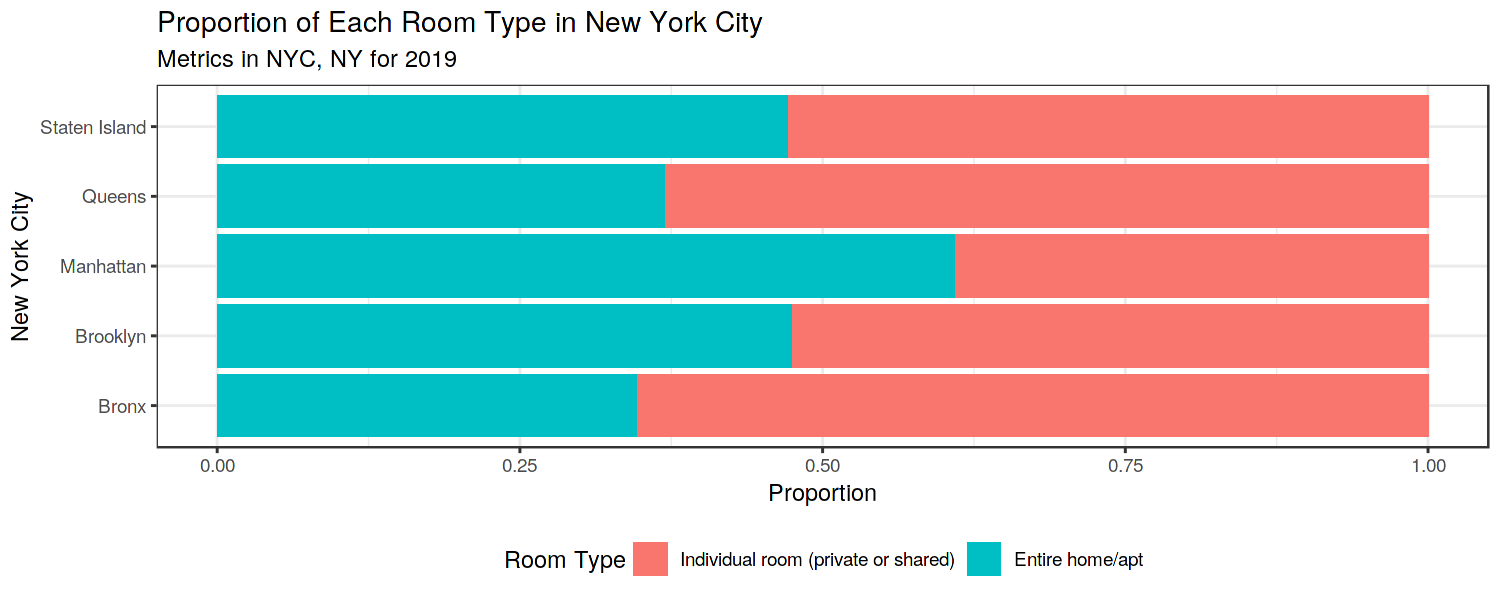

In [10]:
options(repr.plot.res=150,repr.plot.width = 10,repr.plot.height = 4)

df.type = df %>%
    mutate(room_type = ifelse(room_type == "Entire home/apt",'yes','no')) %>%
    group_by(neighbourhood_group) %>%
    count(room_type) %>%
    spread(room_type,n) %>%
    mutate(yes = ifelse(is.na(yes),0,yes)) %>%
    gather('yes','no',key='room_type',value = "number") %>%
data.frame() %>%
ggplot(aes(x = neighbourhood_group,y = number, fill = room_type))+
geom_col(position = "fill")+theme_bw()+
labs(x = "New York City", y = 'Proportion', title = 'Proportion of Each Room Type in New York City',subtitle = 'Metrics in NYC, NY for 2019')+
scale_fill_discrete(name="Room Type",labels = c('Individual room (private or shared)','Entire home/apt'))+
theme(legend.position = "bottom")+
coord_flip()
df.type

The New York City is well known by its tourism and Airbnb is becoming a popular short trip house booking software. Based on the comparasion between private room and entire home, among five regions in New York City, Manhattan has the highest entire home proportion while the entire room/apt proportions are lower than 50% in all the other four regions. This indicates that, as the central of metropolitan,the large proportion of entire home/apt supply may indicate that the people are likely to form a group to visit Manhattan. Although other parts of NYC are not that attractive for group visitors as Manhattan, there is a high demand for airbnb to individual visitors. 

In [11]:
df.mid = df %>%
    filter(neighbourhood_group == "Manhattan",neighbourhood == "Chinatown")

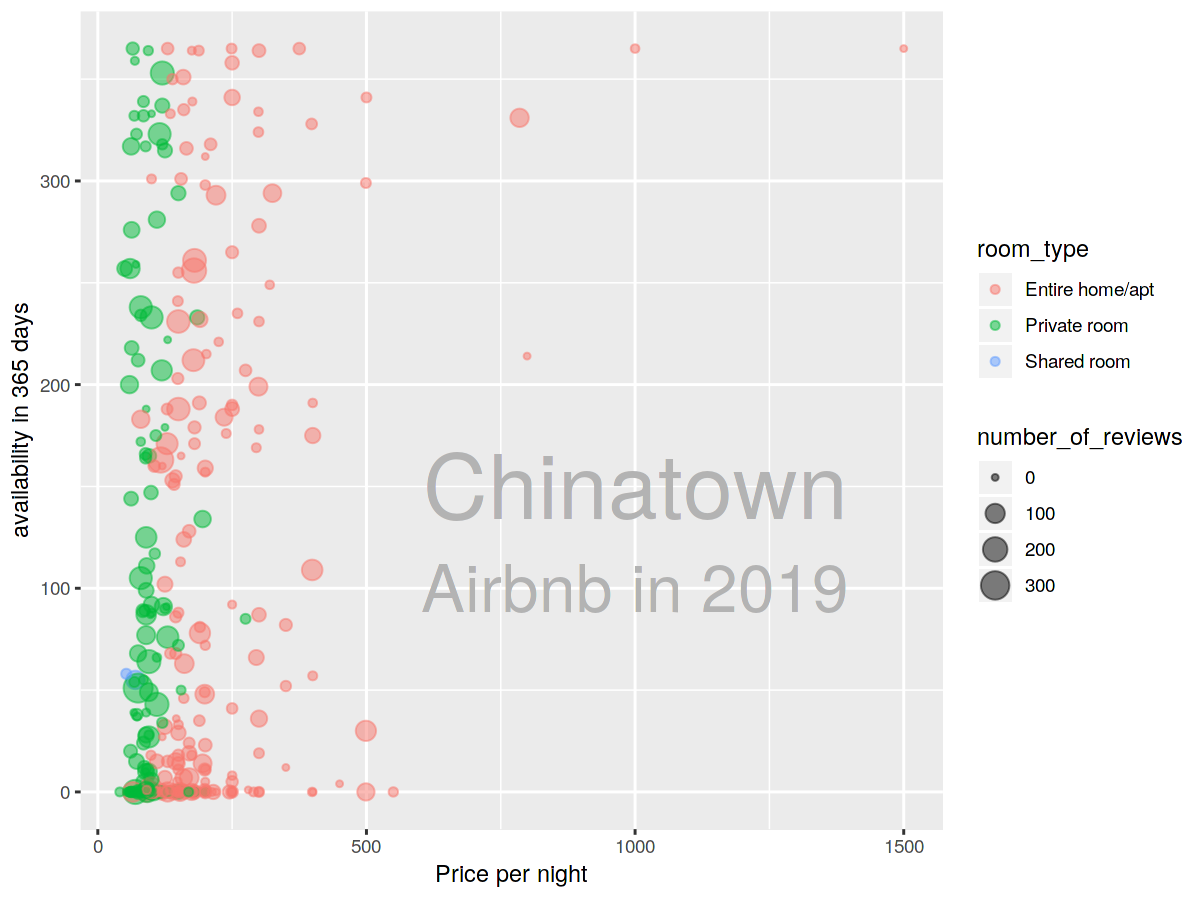

In [15]:
options(repr.plot.res = 150, repr.plot.height = 6, repr.plot.width = 8)
g = ggplot(df.mid, aes(x = price,y = availability_365,color = room_type))
g = g+geom_point(aes(size = number_of_reviews), alpha = 0.5)
g = g+xlab("Price per night")+ylab("availability in 365 days")+annotate("text",x = 1000,y = 150,label="Chinatown",size = 15,color = "grey70")
g = g+annotate("text",x = 1000,y = 100,label="Airbnb in 2019",size = 11,color = "grey70")
g

Chinatown is one of the landmarks in New York City. When looking at the airbnb data during the year 2019, some insteresting points can be found. The majority price per night of Airbnb is less than 500. only nine of hundreds are equal or more expensive than 500 dollars per night, which are all entire home/apt with relatively fewer number of reviews. The only one data of shared room with low number of reviews indicates that people are tend to hold their own private space instead of living together which is a common living culture in China. If only considering entire room/apt and private room, we can easily see that the price per night for private room have narrower variation than entire home/apt, which means private room has a more stable price. Additionally, most Airbnbs in Chinatown have low availability which is less than half a year. 